# **Telco Customer Churn Data Analysis & ML Model**

##### **Created By: Christofer Alexander Kumentas**

Notebook Content

- Problem Statement
- Data Understanding
- Exploratory Data Analysis
- Preprocessing
- Methodology (Modeling/Analysis)
- Conclusion and Recommendation

## **Business Problem Understanding**

**Context**<br>
Di industri telekomunikasi yang sangat kompetitif, banyak penyedia layanan menawarkan beragam layanan termasuk paket ponsel, layanan internet, dan TV kabel. Persaingan yang ketat ini menjadi tantangan besar bagi perusahaan telekomunikasi dalam mempertahankan pelanggan. Perusahaan-perusahaan ini bergantung pada model pendapatan berlangganan, di mana pelanggan berkomitmen pada kontrak atau melakukan pembayaran reguler untuk layanan. Perpindahan pelanggan dapat berdampak langsung pada pendapatan perusahaan.

Pelanggan mungkin berhenti berlangganan layanan telekomunikasi karena berbagai alasan, termasuk ketidakpuasan dengan kualitas layanan, harga yang tinggi, penawaran lebih menarik dari pesaing, atau masalah teknis. Sifat dinamis dan terus berubahnya preferensi pelanggan dan kondisi pasar menegaskan perlunya pendekatan proaktif dalam mempertahankan pelanggan.

Perusahaan telekomunikasi mengandalkan wawasan yang didapat dari analisis perpindahan pelanggan untuk merancang dan menerapkan strategi retensi pelanggan. Strategi ini sering meliputi peningkatan kualitas layanan untuk memenuhi atau melebihi harapan pelanggan, peluncuran program loyalitas pelanggan untuk membina hubungan yang langgeng, menyesuaikan penawaran yang dipersonalisasi sesuai dengan preferensi individu, dan memastikan penyelesaian masalah pelanggan yang cepat dan efisien. Di lanskap persaingan yang ketat ini, memahami perilaku pelanggan dan mengatasi perpindahan pelanggan dengan strategis sangat penting untuk pertumbuhan dan profitabilitas berkelanjutan perusahaan telekomunikasi.

**Problem Statement**

Perusahaan perlu mengidentifikasi faktor-faktor utama yang menyebabkan pelanggan beralih dari layanan mereka. Hal ini bertujuan untuk merumuskan strategi yang efektif dalam mempertahankan pelanggan dan mengurangi angka churn. Dengan ini, perusahaan dapat meningkatkan penjualan, mempertahankan pangsa pasar pelanggan, dan mengoptimalkan faktor-faktor yang menjadi daya tarik utama layanan mereka.

**Goals**

Berdasarkan permasalahan tersebut, perusahaan bermaksud untuk mengembangkankemampuan untuk memprediksi churn pelanggan. Melalui hasil prediksi ini, perusahaan berharap dapat mengidentifikasi pelanggan yang berisiko churn atau tidak churn. Hasil ini akan membantu perusahaan untuk merumuskan strategi yang lebih baik.

Selain itu, perusahaan dapat menggali lebih dalam mengenai faktor-faktor yang mempengaruhi keputusan pelanggan dalam churn. Dengan pemahasan tersebut perusahaan dapat merancang sebuah strategi yang baik pada sisi product untuk mempertahankan customer base mereka. 

**Analytic Approach**

Jadi yang akan dilakukan adalah menganalisis data untuk menemukan faktor yang menyebabkan customer churn dari perusahaan telco dan yang tidak churn.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan telco untuk dapat memprediksi probabilitas seorang customer akan churn atau tidak.

**Metric Evaluation**

- True Negative (TN): Jumlah pengamatan yang benar-benar diprediksi tidak akan churn dan sebenarnya tidak churn.

- False Positive (FP): Jumlah pengamatan yang diprediksi akan churn tetapi sebenarnya tidak churn. Ini juga dikenal sebagai kesalahan tipe I.

- False Negative (FN): Jumlah pengamatan yang diprediksi tidak akan churn tetapi sebenarnya churn. Ini juga dikenal sebagai kesalahan tipe II.

- True Positive (TP): Jumlah pengamatan yang benar-benar diprediksi akan churn dan sebenarnya churn.

**Type 1 error: False Positive**
<br>
konsekuensi: Mengakibatkan pengeluaran tambahan untuk menjaga customer yang sebenarnya tidak perlu mendapatkan perhatian tambahan

**Type 2 error: False Ngative**
<br>
konsekuensi: Mengakibatkan kehilanggan customer karena tidak memberikan perhatian atau layanan tambahan kepada mereka

##### **Biaya dari False Negative (FN):**
Jika seorang pelanggan diprediksi tidak akan churn (FN) tetapi sebenarnya mereka churn, dampak finansial bisa menjadi:

- Kehilangan pendapatan bulanan dari pelanggan yang sebenarnya churn. Misalnya, jika pendapatan rata-rata per pelanggan adalah $50 per bulan, dan pelanggan ini akan churn setelah 6 bulan, maka kerugian dapat dihitung sebagai 6 bulan x $50 = $300.

- Biaya perekrutan pelanggan baru. Biaya pemasaran, promosi, dan diskon untuk menarik pelanggan baru dapat diperkirakan sekitar $100-$200 per pelanggan.


##### **Biaya dari False Positive (FP):**
Jika seorang pelanggan diprediksi akan churn (FP) tetapi sebenarnya tidak churn, biaya yang mungkin timbul adalah:

- Biaya tambahan untuk mempertahankan pelanggan yang sebenarnya tidak akan churn. Ini mungkin termasuk diskon, layanan pelanggan tambahan, atau insentif lainnya. Misalnya, biaya tambahan ini mungkin sekitar $50-$100 per bulan per pelanggan.


Recall(True Positive) adalah metrik evaluasi yang mengukur seberapa baik model mampu mengidentifikasi semua kasus positif yang sebenarnya dalam hal prediksi churn, pelanggan yang benar-benar churn, relatif terhadap keseluruhan kasus posituf yang ada.

Dengan menerapkan metric evaluasi Recall dan dan fokus pada perbaikan performa model untuk mengurangu kesalahan dalam memprediksi pelanggan yang sebenarnya akan churn(False Negative),  kita dapat mengurangi dampak finansial dari kehilangan pendapatan bulanan dan biaya rekrutmen pelanggan baru yang berhubungan dengan False Negatives.

## **Data Understanding**

Data Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


#### **Attribute Information**

| Attribute         | Data Type  | Description                                      |
|-------------------|------------|--------------------------------------------------|
| customerID        | Object     | Unique identifier for each customer.            |
| gender            | Object     | Customer's gender.                              |
| SeniorCitizen     | Int64      | Indicates if the customer is a senior citizen (1 for yes, 0 for no). |
| Partner           | Object     | Indicates if the customer has a partner.       |
| Dependents        | Object     | Indicates if the customer has dependents.      |
| tenure            | Int64      | Number of months the customer has been with the company. |
| PhoneService      | Object     | Indicates if the customer has a phone service. |
| MultipleLines     | Object     | Indicates if the customer has multiple phone lines. |
| InternetService   | Object     | Type of internet service subscribed by the customer. |
| OnlineSecurity    | Object     | Indicates if the customer has online security service. |
| OnlineBackup      | Object     | Indicates if the customer has online backup service. |
| DeviceProtection  | Object     | Indicates if the customer has device protection service. |
| TechSupport       | Object     | Indicates if the customer has tech support service. |
| StreamingTV       | Object     | Indicates if the customer has streaming TV service. |
| StreamingMovies   | Object     | Indicates if the customer has streaming movie service. |
| Contract          | Object     | Type of contract (e.g., month-to-month, one-year, two-year). |
| PaperlessBilling  | Object     | Indicates if the customer uses paperless billing. |
| PaymentMethod     | Object     | Payment method used by the customer. |
| MonthlyCharges    | Float64    | Monthly subscription fees paid by the customer. |
| TotalCharges      | Object     | Total charges paid by the customer. |
| Churn             | Object     | Indicates whether the customer has churned (yes or no). |


**Dataset ini mencakup informasi tentang:**

- **Pelanggan yang meninggalkan layanan dalam sebulan terakhir** –  *Churn column*

- **Layanan yang diikuti setiap pelanggan** – *phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies*

- **Informasi akun pelanggan** – *how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges*

- **Info demografis tentang pelanggan** – *gender, age range, and if they have partners and dependents*

In [662]:

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for machine learning
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [586]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
display(df.head(), df.tail())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [588]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### **Data Cleaning**

In [589]:
# drop customer ID
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


membuang kolom customerID dikarenakan tidak relevant dengan EDA dan pemodelan

In [590]:
# Change totalcharges to numeric format 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce") 

# Change 0 and 1 from column SeniorCitizen to No and Yes
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

- mengubah kolom `TotalCharges` menjadi numerikal (floatt64), diakarenakn value kolom tersebut dalam bentuk numerik
- Mapping kolom `SeniotCitizen` menjadi kategorik, dikarenakn kolom tersebut bersifat kategorikal

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [592]:
# check for missing values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Terdapat missing values yang harus diatas pada kolom `TotalCharges`

In [593]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [594]:
missing_TotalCharges_row = df[df['TotalCharges'].isna()].index
missing_TotalCharges_row

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Menangani missing value dengan imput menggunakan media(menggunakan median dikarenakan distribusi dari kolom tersebut tidak normal)

In [595]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Check for missing value again
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [596]:
# look up previously missing value rows which has been filled
df.loc[missing_TotalCharges_row]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1397.475,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,1397.475,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,1397.475,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1397.475,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1397.475,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,1397.475,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1397.475,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,1397.475,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,1397.475,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,1397.475,No


## **EDA(Exploratory Data Analysis)**

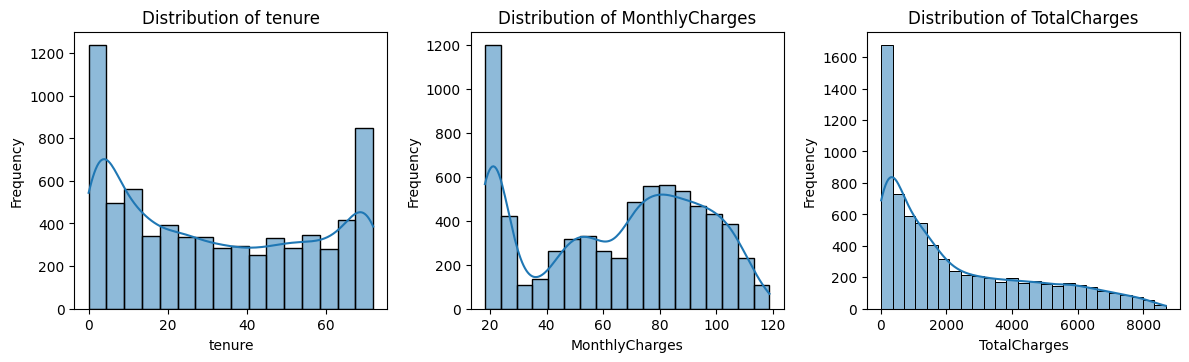

In [597]:
plt.figure(figsize=(12, 10))
pltnum = 1

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for column in num_cols:
    if column != 'SeniorCitizen':
        plt.subplot(3, 3, pltnum)
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        pltnum += 1

plt.tight_layout()
plt.show()


- **Tenure & MonthlyCharges (Bimodal Distribution)**:
Distribusi Bimodal pada kolom Tenure dan MonthlyCharges menunjukan adanya dua puncak atau kelompok nilai yang berbeda. Ini bisa menandakan adanya dua kelompok pelanggan yang bebeda dalam dataset, terkait dengan masa langganan (tenure) dan biaya bulanan (MonthlyCharges)

- Tenure: bisa ada dua kelompok pelanggan, misalnya, kelompok yang baru bergabung dalam waktu singkat dan kelom lain yang sudah menjadi pelanggan lebih lama. 
- MonthlyCharges: bisa menandakan ada dua kelompok pelanggan dengan biaya bulanan yang berbeda, misalnya satu kelompok bayar lebih murah dan yang lain bayar lebih mahal. 

- **TotalCharges(Positvely Right Skewed Distribution)**:
Distribusi ini menunjukan bahwa sebagian besar pelanggan cenderung memiliki total biaya yang relatif rendahm senebtara ada senjumlah yang kecil.

Note: Walaupun column 'SeniorCitizen' memiliki tipe data numerik, variable tersebut pada dasarnya bersifat categoric. Nilai 0 dan 1 pada kolom 'SeniorCitizen' mewakili dua kondisi, seperti 'No' dan 'Yes'. Oleh karena itu column tersebut diabaikan.

#### **Boxplot** 

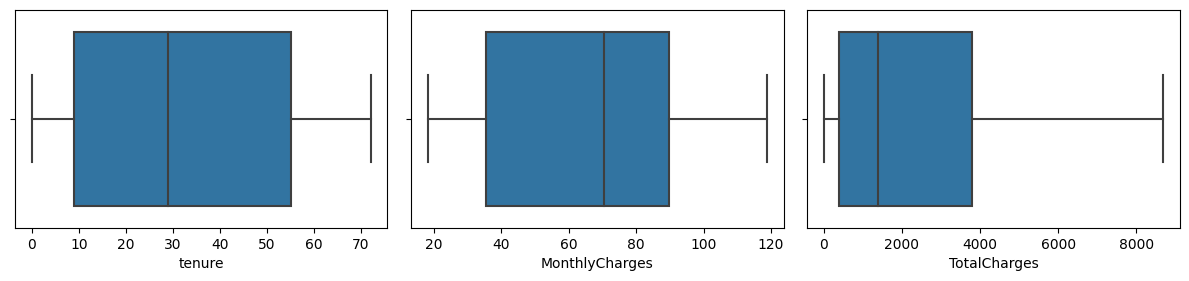

In [598]:
plt.figure(figsize=(12,8))
pltnum = 1
# filter columns that are numeric 
num_cols = df.select_dtypes(include=['int', 'float']).columns

for column in num_cols:
    if column != 'SeniorCitizen':
        plt.subplot(3, 3, pltnum)
        sns.boxplot(data=df, x=column)
        pltnum += 1
    
plt.tight_layout()
plt.show()

menggunakan boxplot untuk melihat apakah ada outlier pada kolom numerik, berdasarkan hasil plotting dapat dilihat tidak ada outliers yang berada pada upper and lower bound

In [599]:
unique_cat_values_dict = {}

for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        unique_values_count = df[column].nunique()
        unique_cat_values_dict[column] = {'Count': unique_values_count, 'Values': unique_values}

cat_values_df = pd.DataFrame(unique_cat_values_dict).T
cat_values_df

,Count,Values
gender,2,"[Female, Male]"
SeniorCitizen,2,"[No, Yes]"
Partner,2,"[Yes, No]"
Dependents,2,"[No, Yes]"
PhoneService,2,"[No, Yes]"
MultipleLines,3,"[No phone service, No, Yes]"
InternetService,3,"[DSL, Fiber optic, No]"
OnlineSecurity,3,"[No, Yes, No internet service]"
OnlineBackup,3,"[Yes, No, No internet service]"
DeviceProtection,3,"[No, Yes, No internet service]"


In [600]:
unique_num_values_dict = {}

# Iterate through columns and store unique values in the dictionary
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        unique_values = df[column].unique()
        unique_values_count = df[column].nunique()
        unique_num_values_dict[column] = {'Count': unique_values_count, 'Values': unique_values}

num_values_df = pd.DataFrame(unique_num_values_dict).T
num_values_df

,Count,Values
tenure,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
MonthlyCharges,1585,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,..."
TotalCharges,6531,"[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5..."


In [601]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


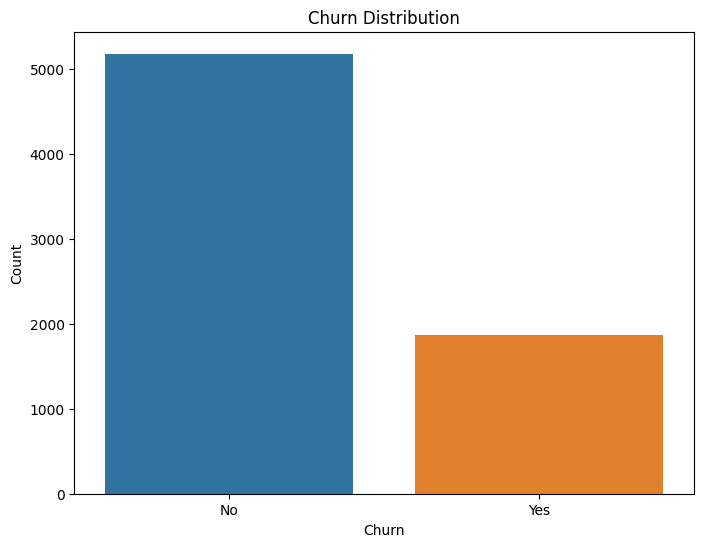

Churn value:


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [602]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

print("Churn value:")
df['Churn'].value_counts()

Porporsi No Churn lebih tinggi dibandingkan porsi yang Churn(Yes), Bias dari data akan menyebabkan hasil yang kurang akurat, terutama dalam mengidentifikasi pelanggan yang benar-benar mungkin berhenti berlangganan. 

Dapat dilakukan teknik oversampling atau undersampling untuk menyeimbangkan proporsi data anatra kedua values, sehingga model lebih seimbang dan akurat.

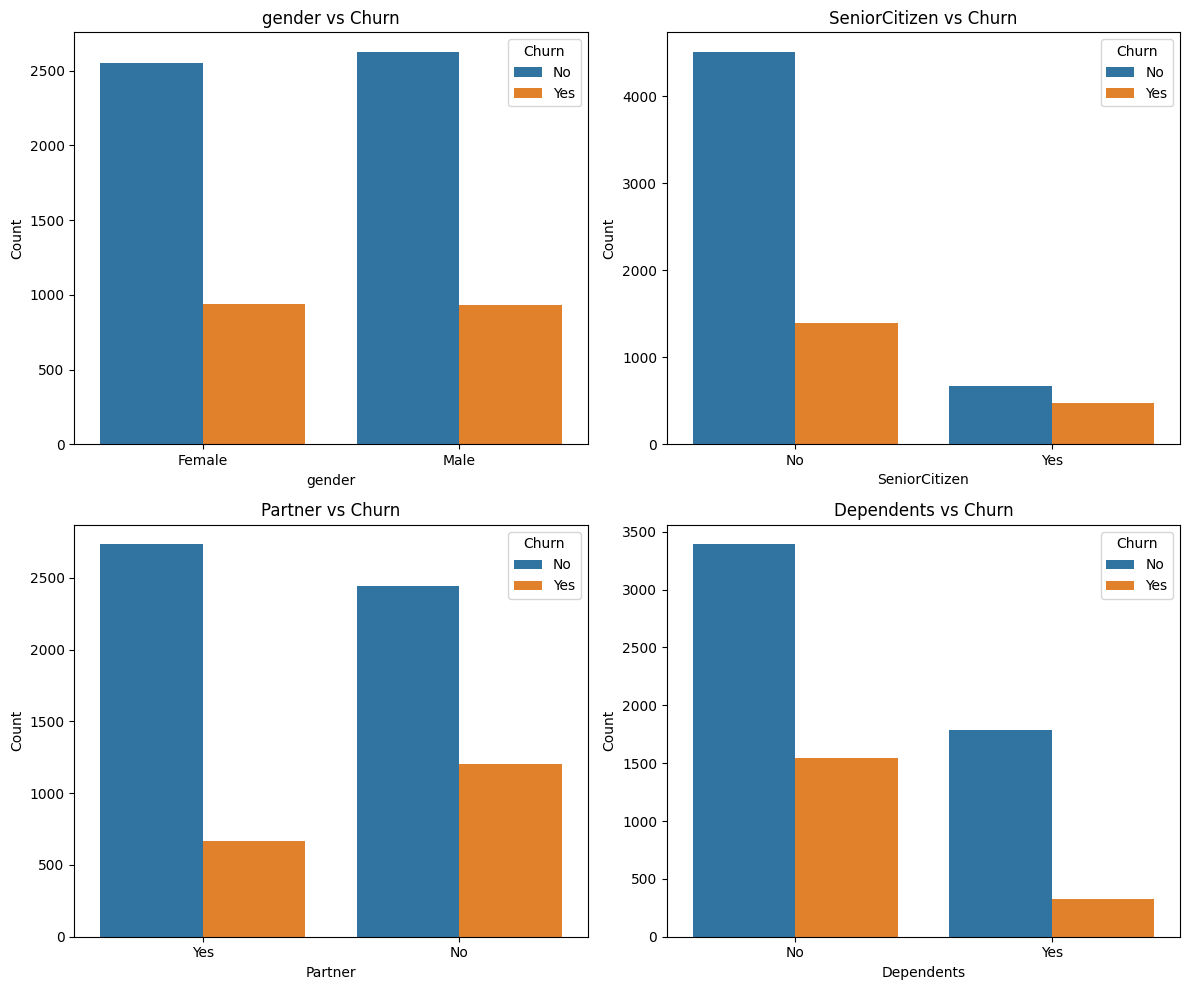

In [603]:
df_demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(12, 10))
for i, col in enumerate(df_demographic_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [604]:
for col in df_demographic_cols:
    churn_rates = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    print(f"Churn Rates by {col}")
    print(churn_rates.to_string(formatters={'No': '{:.2%}'.format, 'Yes': '{:.2%}'.format}))
    print("===========================")
    print()

Churn Rates by gender
Churn      No    Yes
gender              
Female 73.08% 26.92%
Male   73.84% 26.16%

Churn Rates by SeniorCitizen
Churn             No    Yes
SeniorCitizen              
No            76.39% 23.61%
Yes           58.32% 41.68%

Churn Rates by Partner
Churn       No    Yes
Partner              
No      67.04% 32.96%
Yes     80.34% 19.66%

Churn Rates by Dependents
Churn          No    Yes
Dependents              
No         68.72% 31.28%
Yes        84.55% 15.45%



**Analisi berdasarkan faktor demografis:**
- **Gender:**
    - Tingkat churn di antara pelangga pria dan wanita cenderung serupa, dengan pria sebanyak 26.16% dan wanita 26.92%. Tidak ada perbedaan signifikan dalam tingkat churn berdasarkan jenis kelamin. Menunjukan bahwa faktor jenis kelamin mungkin bukan faktor utama yang mempengaruhi keputusan Churn.
<br>

- **SeniorCitizen:**
    - Pelanggan yang merupakan SeinorCitizen memiliki tingkat Churn lebih tinggi sebesar 41.68% dibandingkan dengan mereka yang bukan sekitar 23.61%. Faktor Usianya tampaknya memiliki pengaruh signifikan dalam tingkat Churn, mungkin karena kebutuhan atau preferensi layanan yang berbeda
<br>

- **Partner:**
    - Pelanggan yang memiliki pasangan (married or in a relationship) menunjukkan tingkat churn yang lebih rendah (19.66%) dibandingkan dengan pelanggan yang tidak memiliki pasangan (32.96%). 
<br>

- **Dependents:**
    - Pelanggan yang memiliki dependents menunjukan tingkat churn yang lebih rendah 15.45% dibangdingkan dengan pelangga yang tidak memiliki dependets 31.28%. Ini bisa menunjukan bahwa keluarga bisa menjadi faktor peting yang mempengaruhi Churn.

Mengetahui bahwa faktor seperti usia dan status Partner & Dependents berperan dalam tingkat churn dapat membantu dalam pengembangan strategi retensi pelanggan yang lebih efektif. 

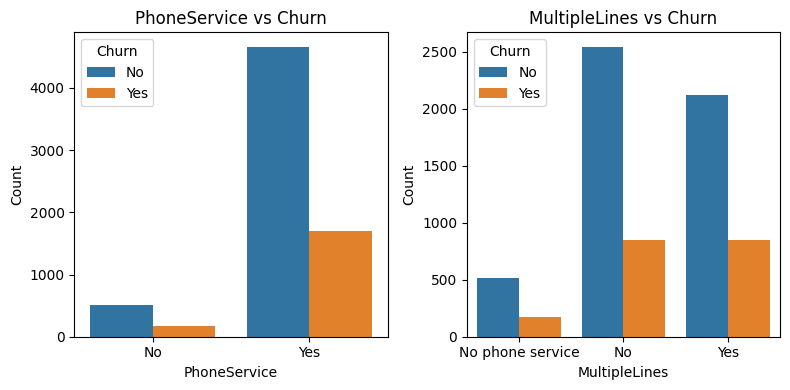

In [605]:
df_phone_service = ['PhoneService', 'MultipleLines']

plt.figure(figsize=(8, 4))
for i, col in enumerate(df_phone_service, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [606]:
for col in df_phone_service:
    churn_rates_phone_services = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    print(f"Churn Rates by {col}")
    print(churn_rates_phone_services.to_string(formatters={'No': '{:.2%}'.format, 'Yes': '{:.2%}'.format}))
    print("===========================")
    print()

Churn Rates by PhoneService
Churn            No    Yes
PhoneService              
No           75.07% 24.93%
Yes          73.29% 26.71%

Churn Rates by MultipleLines
Churn                No    Yes
MultipleLines                 
No               74.96% 25.04%
No phone service 75.07% 24.93%
Yes              71.39% 28.61%



- **PhoneService:**
    - Tidak ada perbedaan signifikan dalam tingkat churn antara pelanggan yang menggunakan layanan telpon(26.71%) dan yang tidak(24.93%)

- **MultipleLines:**
    - Pelanggan dengan layanan MultipleLines yang mengizinkan lebih dari satu saluran telpon cenderung memiliki tingkat churn lebih tinggi(28.61%) dibandingkan dengan yang tidak(25.04%) dan 24.93% bagi yang sama sekali tidak memiliki layanan telepon tambahan. Pengunaan layanan temabahan saluran telepon sedikit berkorelasi dengan tingkat churn yang lebih tinggi. 

penggunan yang memiliki MultipleLines memiliki tingkat churn yang paling tinggi, mungkin dikarenakan adanya layanan service lainnya yang digunakan diluat dari Telco yang menyebabkan beralihnya penguna. 

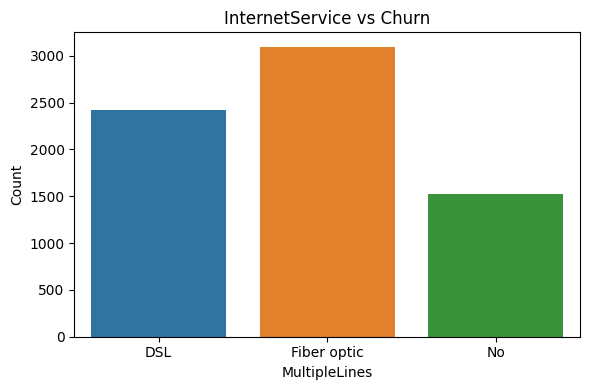

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


In [607]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='InternetService')
plt.title(f"InternetService vs Churn")
plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print(df['InternetService'].value_counts())

- **"No"**: Menunjukan bahwa customer tidak memiliki layanan tersebut.
- **"Yes"**: Menunjukan bahwa customer berlangganan atau mengunakan layanan tertentu.
- **"No Internet Service"**: Menunjukan kategori/layanan yang khusus dengan internet. Bila customer memiliki No Internet Service, fitur yang terkait dengan internet tidak berlaku atau disediakan.

Perbedaan antara **"No"** dan **"No Internet Service"** ada pada konteks layanan yang terkait dengan internet. "No Internet Service" secara khusus merujuk pada situasi diaman customer tidak memilii konektivitas internet sama sekali, sehingga layanan yang berhubungan dengan interner menjadi tidak berlaku



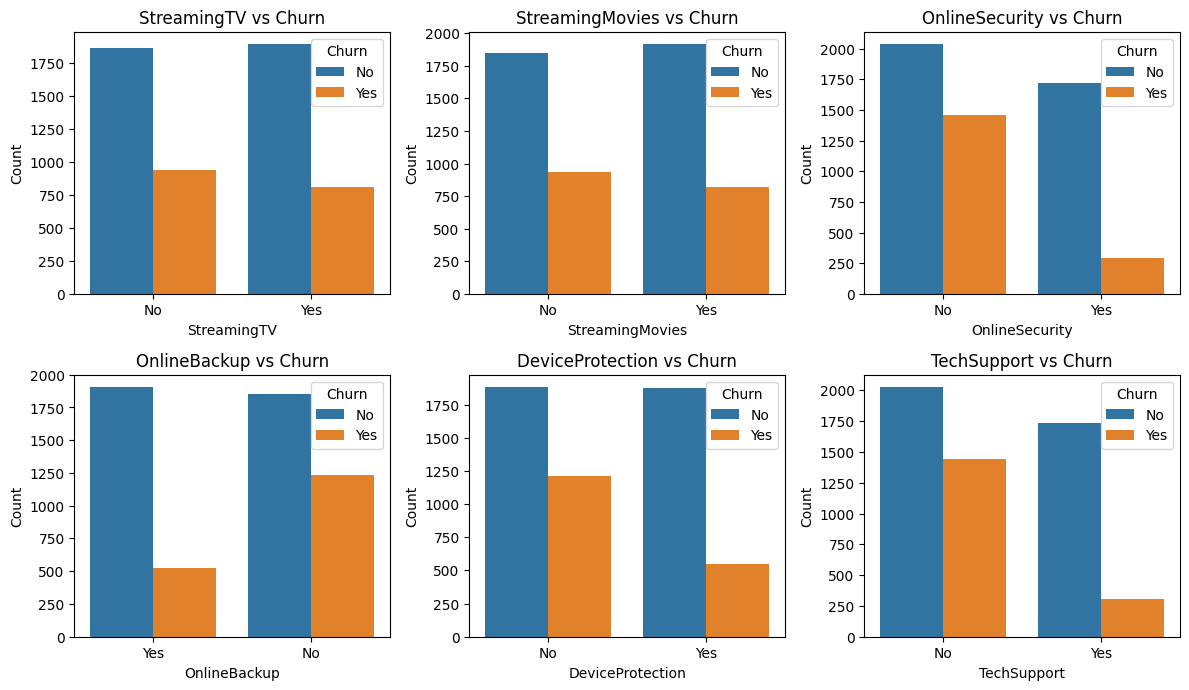

In [608]:
df_services = ['StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

plt.figure(figsize=(12, 10))
for i, col in enumerate(df_services, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df[df[col] != 'No internet service'], x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [609]:
df_services = ['StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

for col in df_services:
    # Filter out 'No internet service' rows before computing churn rates
    churn_rates_services = df[df[col] != 'No internet service'].groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    print(f"Churn Rates by {col}")
    print(churn_rates_services.to_string(formatters={'No': '{:.2%}'.format, 'Yes': '{:.2%}'.format}))
    print("===========================")
    print()


Churn Rates by StreamingTV
Churn           No    Yes
StreamingTV              
No          66.48% 33.52%
Yes         69.93% 30.07%

Churn Rates by StreamingMovies
Churn               No    Yes
StreamingMovies              
No              66.32% 33.68%
Yes             70.06% 29.94%

Churn Rates by OnlineSecurity
Churn              No    Yes
OnlineSecurity              
No             58.23% 41.77%
Yes            85.39% 14.61%

Churn Rates by OnlineBackup
Churn            No    Yes
OnlineBackup              
No           60.07% 39.93%
Yes          78.47% 21.53%

Churn Rates by DeviceProtection
Churn                No    Yes
DeviceProtection              
No               60.87% 39.13%
Yes              77.50% 22.50%

Churn Rates by TechSupport
Churn           No    Yes
TechSupport              
No          58.36% 41.64%
Yes         84.83% 15.17%



- **Streaming TV & Streaming Movies:**
    - Pelanggan yang menggunakan layanan streaming TV dan Streaming Movies memiliki tingkat churn yang lebih rendah namun tidak secara signifikan dengan pelanggan yang tidak menggunakan layanan tersebut.

- **Online Security, Online Backup, Device Protection, & Tech Support:**
    - Pelanggan yang menggunakan layanan keamanan online, backup online, perlindungan perangkat, dan layanan dukungan teknis cenderung memiliki tingkat churn yang jauh lebih rendah dibandingkan dengan pelanggan yang tidak menggunakan layanan ini. Hal ini menunjukkan bahwa adopsi layanan-layanan ini cenderung dapat mengurangi kecenderungan pelanggan untuk berhenti berlangganan.

- **Online Security & Tech Support:**
    - Layanan kemanan dan layanan dukungan teknis memiliki perbedaan churn rate paling signifkan. menandakan bahwa keamanan internet dan dukungan teknis membantu menurunkan tingkat churn. layanan ini memainkan peran penting dalam mempertahankan pelanggan.

Dapat dipertimbagkan untuk meningkatkan kualitias promosi layanan streaming dan Movies untuk mengurangi kecendrungan pelanggan untuk berhenti berlangganan. untuk service layanan lainnya bisa dilakukan upaya untuk mempertahankan retensi pelanggan.



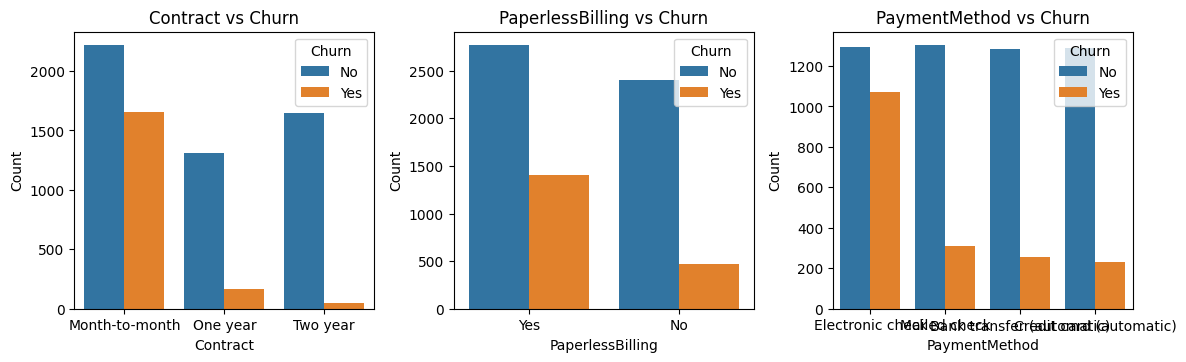

In [610]:
df_payment = ['Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(12, 10))
for i, col in enumerate(df_payment, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [611]:
for col in df_payment:
    churn_rates_payment = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    print(f"Churn Rates by {col}")
    print(churn_rates_payment.to_string(formatters={'No': '{:.2%}'.format, 'Yes': '{:.2%}'.format}))
    print("===========================")
    print()

Churn Rates by Contract
Churn              No    Yes
Contract                    
Month-to-month 57.29% 42.71%
One year       88.73% 11.27%
Two year       97.17%  2.83%

Churn Rates by PaperlessBilling
Churn                No    Yes
PaperlessBilling              
No               83.67% 16.33%
Yes              66.43% 33.57%

Churn Rates by PaymentMethod
Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic) 83.29% 16.71%
Credit card (automatic)   84.76% 15.24%
Electronic check          54.71% 45.29%
Mailed check              80.89% 19.11%



**1. Contract:**
    - Contract 'Month-to-month' memiliki tingkat Churn paling besar sekitar **42.71%**, yang jauh lebih tinggi dibandingkan dengan 'One year' (**11.27%**) dan 'Two year' (**2.83%**).
    - Pelanggan dengan contract jangka pendek memiliki tingkat Churn lebih tinggi daripada yang memiliki contract jangka panjang 

**2. PeperlessBilling:**
    - Cistomer yang menggunakan PaperlessBilling memiliki tingkat Churn yang lebih tinggi sebesar **33.57%** dibandingkan dengan customer yang tidak menggunakan PaperlessBilling (**16.33%**). Mungkin ada hubungan antara kecepatan dan kemudahan proses pembayaran elektronik dengan peutusan pelangan untuk berhenti berlanganan.

**3. PaymentMethod:**
    - Metode pembayaran 'Electronic check' memiliki tingkat Churn yang sangat tinggi (**45.29%**) dibandingkan dengan 'Bank transfer' (**16.71%**), 'Credit card' (**15.24%**), dan 'Mailed check' (**19.11%**).


- Electronic Check sebagai metode pembayaran yang memiliki tingkat churn paling tinggi bisa menandakan bahwa masalah keamanan atau kenayaman dalam metode pembayaran ini dapat mempengaruhi keputusan pelanggan untuk berhenti. 
- Meskipun Mail Check bikan metode otomatis, memiliki tingkat churn yang lebih rendah daripada Electronic Check.

- Pilihan Payment method berpengaruh signifikan terhadap kecendrugan pelanggan untuk berhenti berlangganan.

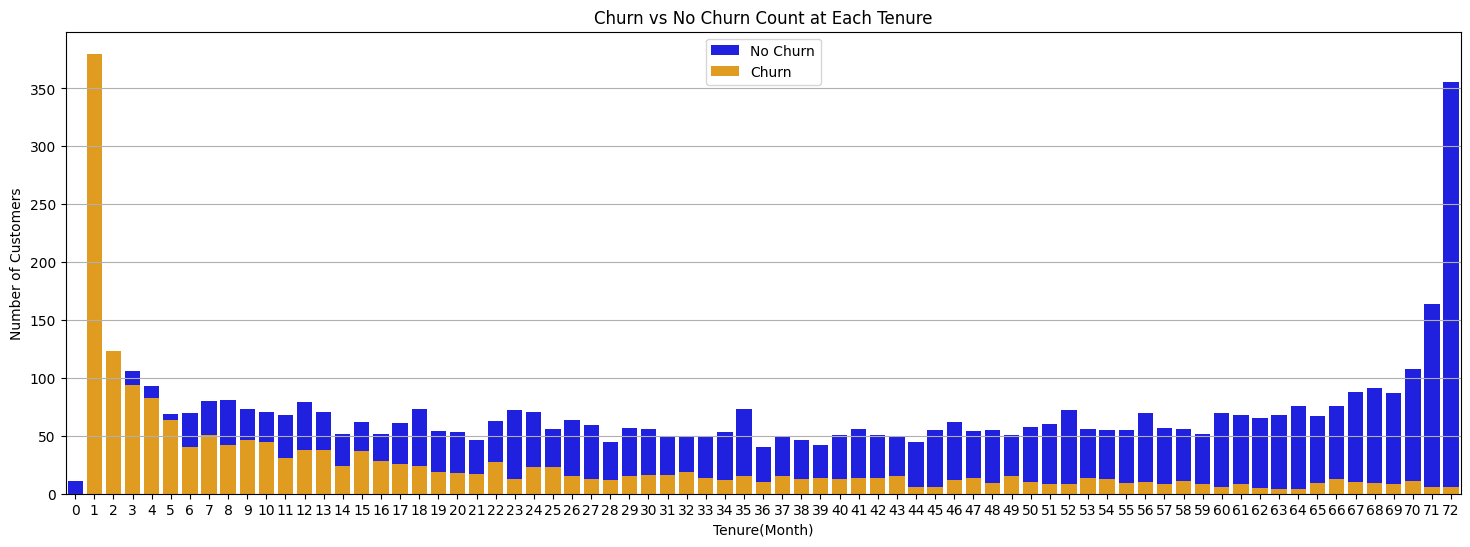

In [612]:
tenure_churn_counts = df.groupby(['tenure', 'Churn']).size().unstack().fillna(0)
tenure_churn_counts.reset_index(inplace=True)

plt.figure(figsize=(18, 6))
sns.barplot(x='tenure', y='No', data=tenure_churn_counts, color='blue', label='No Churn')
sns.barplot(x='tenure', y='Yes', data=tenure_churn_counts, color='orange', label='Churn')
plt.xlabel('Tenure(Month)')
plt.ylabel('Number of Customers')
plt.title('Churn vs No Churn Count at Each Tenure')
plt.legend()
plt.grid(axis='y')
plt.show()

- Tenure Janga Pendek
Terlihat bahwa pada bulan-bulan awal, terdapat jumlah pelanggan yang berhenti berlangganan yang cenderung lebih tinggi. Ini mengindikasikan kecenderungan bahwa pelangga memiliki kemungkinan untuk churn pada periode awal. Hal ter tersebut dapat diefek dari berbagai hal external maupin layanan yang digunakan. Cth: pelanggan hanya mencoba saja, dan menemukan langganan lebih bagus. 

- Tenure Janga panjang:
Seiring bertambahkan masa berlangganan, jumlah pelanggan yang Churn cenderungmenurun secara signifikan.

- Dikarenakan tingkat churn pada bulan awal yang tinggi perusahaan dapat menerapkan kebijakan retensi khusu untuk pelanggan baru guna untuk memperpanjang langanan dan mengurangi tingkat Churn

Note: 
- Tenure dihitung dalam bulan
- Tenure angka 0 menunjukan bahwa pelanggan belumn menggunakan layanan lebih dari 1 bulan

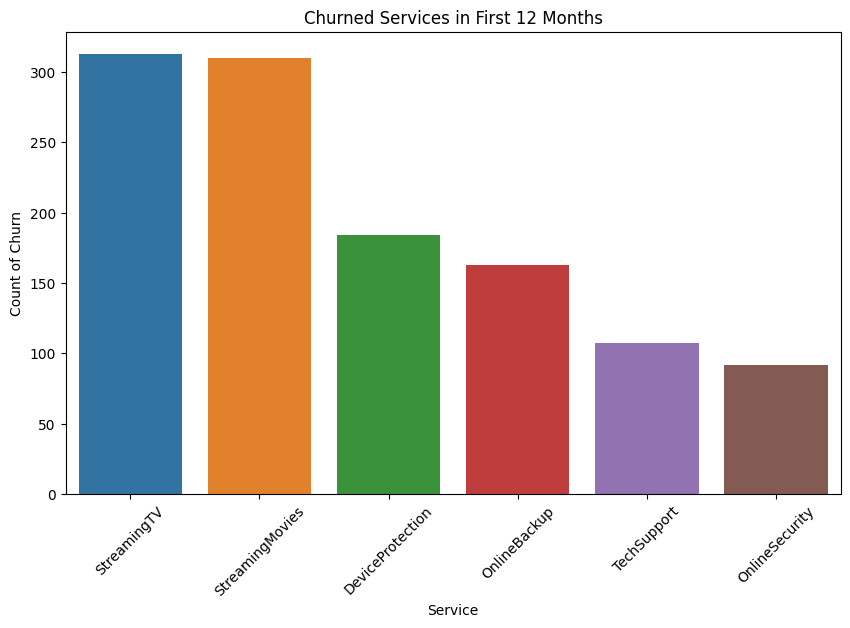

StreamingTV         313
StreamingMovies     310
DeviceProtection    184
OnlineBackup        163
TechSupport         107
OnlineSecurity       92
Name: Yes, dtype: int64
Total Churned 1169


In [613]:
churned_customers_first_twelve_tenure = df[(df['tenure'] <= 12) & (df['Churn'] == 'Yes')]

# Calculate churned services for customers with 12 months or less tenure
churned_services = churned_customers_first_twelve_tenure[df_services].apply(pd.Series.value_counts).fillna(0).loc['Yes'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=churned_services.index, y=churned_services.values)
plt.title('Churned Services in First 12 Months')
plt.xlabel('Service')
plt.ylabel('Count of Churn')
plt.xticks(rotation=45)
plt.show()

print(churned_services)
print("Total Churned", churned_services.sum())


- Layanan Streaming (TV & Movies) memiliki jumlah pelanggan yang behenti berlangganan paling tinggi dalam 12 bulan pertama. Hal ini bisa menunjukan bahwa kebutuhan pelanggan terhadap konten atau kualitas layanan streaming mungkin tidak terpenuhi yang dapat mengakibatkan pelanggan untuk beralih pada layanan berbeda 

### **Data Preprocessing**

##### **LabelEncoder()** 
adalah sebuah fungsi yang digunakan untuk mengubah nilai-nilai dalam kolom kategori menjadi nilai-nilai numerik. LabelEncoder() bekerja dengan mengambil setiap nilai unik dari kolom kategori, lalu memberikan nomor secara berurutan untuk merepresentasikan nilai-nilai tersebut. Contoh pada kolom `Churn` dengan nilai "Yes dan "No", akan diubah menjadi "0" dan "1" 

In [614]:
# Label encode Churn column for train and test sets
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

# Check the transformed target labels
print(df['Churn'].unique()) 

[0 1]


##### **MinMaxScaler()** 
adalah sebuah metode preprocessing yang digunakan untuk melakukan penskalaan fitur numerik ke dalam rentang nilai tertentu, umunya dari 0 hingga 1. Tujuan utamanya adalah untuk memastikan bahwa semua fitur memiliki skala yang sama, sehingga tidak ada fitur yang memiliki pengaruh yang lebih dominan hanya karena besarnya skala nilai yang berbeda.

pada data numerik seperti 'tenure', 'MonthlyCharges', dan 'TotalCharges'. Proses penskalaan ini akan mengubah nilai-nilai pada kolom-kolom tersebut sehingga berada dalam rentang antara 0 dan 1.

##### **OneHotEncode()** 
sama seperti LabelEncoder() merupakan sebuah teknik encoding untuk mengubah variable kategori menjadi vektor biner. Ketika suatu kolom memiliki beberapa kategori unik, OneHotEncode() akan membuat kolom baru untuk setiap kategori unik dan menandai keberadaan kateogri tersebut dengan nilai 1 atau 0.

In [615]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

transformer = ColumnTransformer([
    ('numeric', MinMaxScaler(), ['tenure', 'MonthlyCharges', 'TotalCharges']),
    ('onehot', OneHotEncoder(drop='first'), categorical_columns)
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

### **Data Splitting**

In [616]:
# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [617]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
testing.head()

,numeric__tenure,numeric__MonthlyCharges,numeric__TotalCharges,onehot__gender_Male,onehot__SeniorCitizen_Yes,onehot__Partner_Yes,onehot__Dependents_Yes,onehot__PhoneService_Yes,onehot__MultipleLines_No phone service,onehot__MultipleLines_Yes,...,onehot__StreamingTV_No internet service,onehot__StreamingTV_Yes,onehot__StreamingMovies_No internet service,onehot__StreamingMovies_Yes,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_Yes,onehot__PaymentMethod_Credit card (automatic),onehot__PaymentMethod_Electronic check,onehot__PaymentMethod_Mailed check
0,0.486111,0.306926,0.194185,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.208333,0.565022,0.130707,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.180556,0.220727,0.065948,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.361111,0.549078,0.217731,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.013889,0.260588,0.002966,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### **Model Benchmarking: K-Fold**

In [620]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=24)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ("KNN", KNeighborsClassifier()),
    ('XGB', XGBClassifier()),
    ('GB', GradientBoostingClassifier()),
    ('LGBM', LGBMClassifier()),
]

results = {'Model': [], 'Mean_recall_score': [], 'Std': []}

skfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

for name, algo in models:
    # Correctly defining the pipeline with tuples for steps
    pipe_model = Pipeline([('transformer', transformer), ('model', algo)])
    
    model_cv = cross_val_score(estimator=pipe_model, 
                               X=X_train, 
                               y=y_train,
                               cv=skfold,
                               scoring='recall',
                               error_score='raise')
    
    results['Model'].append(name)
    results['Mean_recall_score'].append(model_cv.mean())
    results['Std'].append(model_cv.std())

results_df = pd.DataFrame(results)
results_df.sort_values('Mean_recall_score', ascending=False)


[LightGBM] [Info] Number of positive: 1345, number of negative: 3725
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265286 -> initscore=-1.018673
[LightGBM] [Info] Start training from score -1.018673
[LightGBM] [Info] Number of positive: 1345, number of negative: 3725
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 30
[LightGBM] [Info] [binary:

,Model,Mean_recall_score,Std
0,Logistic Regression,0.539897,0.041841
3,KNN,0.523781,0.039864
5,GB,0.518465,0.027572
6,LGBM,0.515119,0.025663
4,XGB,0.508416,0.024090
1,Decision Tree,0.494944,0.032538
2,Random Forest,0.480349,0.038072


Dari hasil benchmark model, didapat model dengan nilai recall score tertinggi yaitu `LogisticRegression` sebesar 0.539(53.9%). Berikutnya saya akan mencoba melakukan hyperparameter tuning terhadap model tersebut untuk meningkatkan performa model

### **Hyperparameter Tuning**

Berdasarkan hasil analisa dataset Telco Customer Churn tidak seimbang, ketika menghadapi data yang tidak seimbang, penting untuk melakukan resampling saat melalukan Hyperparameter Tuning. Teknik resampling yang digunakan pada pemodelan ini adalah:

- **SMOTE (Synthetic Minority Over-sampling Technique)**
merupakan teknik oversampling yang membuat sampel sintetis baru untuk kelas minoritas dengan cara menggabungkan fitur-fitur dari sampel kelas minoritas yang sudah ada. Ini membantu menghindari overfitting karena pembuatan sampel sintetis berdasarkan sampel-sampel yang sudah ada.

### **Logistic Regression**


Merupakan algoritma kalsifikasi dalam machine learning yang digunakan untuk memprediksi probabilitas dari suatu peristiwa dengan dua kemungkinan hasil. Algoritma ini cocok untuk masalah kalsifikasi biner, diaman output yang diprediksi dalam bentuk dua kelas yang berbeda. Logistic Regression kerja dengan cara menghitung probabilitas bahwa sebuah instance data masuk ke dalam salah satu dari dua kelas yang ada berdasarkan fitu-fiturnya. Algoritma ini menggunakan fungsi logistik atau sigmoig untuk mengubah hasil regresi linear menjadi probabilitas, yang memiliki rentang nilai antara 0 dan 1.

Model LogisticRegression dalam machine learning memiliki bebrapa parameter kunci yang dapat dikonfigurasi untuk menoptimalkan kinerjanya. List parameter yang akan digunakan pada pemodelan LogisticRegression ini merupakan:

| Parameter              | Penjelasan                                                             |
|------------------------|------------------------------------------------------------------------|
| `modeling__C`          | Mengontrol kekuatan regularisasi dalam model Logistic Regression        |
| `modeling__solver`     | Menentukan algoritma yang menyelesaikan masalah optimasi                |
| `modeling__max_iter`   | Menentukan jumlah iterasi maksimum untuk konvergensi algoritma          |
| `modeling__class_weight`| Memungkinkan penyesuaian bobot kelas untuk menangani ketidakseimbangan kelas |
| `modeling__random_state`| Menentukan seed (benih) untuk pengacakan saat randomization             |


In [642]:
pipe_model_logreg = imbpipeline([
    ('transformer', transformer),
    ('smote', SMOTE(random_state=0)),
    ('modeling', LogisticRegression())
])

# Parameters for hyperparameter tuning
param_grid_logreg = {
    'modeling__C': [0.1, 1, 10],
    'modeling__solver': ['liblinear', 'saga'], 
    'modeling__max_iter': [1000, 1500, 2000], 
    'modeling__class_weight': [None, 'balanced'],
    'modeling__random_state': [24]
}

# Grid search for hyperparameter tuning
gridsearch_logreg = GridSearchCV(
    estimator=pipe_model_logreg,
    param_grid=param_grid_logreg,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    error_score='raise'
)

# Fit the grid search for Logistic Regression
gridsearch_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         MinMaxScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSe...
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('smote', SMOTE(random_state=0)),
                                       ('modeling', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'modeling__C': [0.1, 1, 10],
                         'modeling__class_weight': [None, 'balanced'],
                         'modeling__max_iter': [1000, 1500, 2000],
                         'modeling__random_state': [24],
                         'modeling__solver': ['liblinear', 'saga']},
             scoring='recall')

In [657]:
# Best hyperparameters and best recall score
best_params_logreg = gridsearch_logreg.best_params_
best_score_logreg = gridsearch_logreg.best_score_

print("Best hyperparameters for Logistic Regression:", gridsearch_logreg.best_params_)
print("Best recall score for Logistic Regression:", gridsearch_logreg.best_score_)

Best hyperparameters for Logistic Regression: {'modeling__C': 10, 'modeling__class_weight': None, 'modeling__max_iter': 1000, 'modeling__random_state': 24, 'modeling__solver': 'liblinear'}
Best recall score for Logistic Regression: 0.7919732441471572


In [644]:
pd.DataFrame(gridsearch_logreg.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__C,param_modeling__class_weight,param_modeling__max_iter,param_modeling__random_state,param_modeling__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
35,1.802010,0.061414,0.016859,0.002166,10,balanced,2000,24,saga,"{'modeling__C': 10, 'modeling__class_weight': ...",0.822742,0.80602,0.795987,0.779264,0.755853,0.791973,0.022919,1
24,0.128144,0.017010,0.019686,0.004696,10,None,1000,24,liblinear,"{'modeling__C': 10, 'modeling__class_weight': ...",0.822742,0.80602,0.795987,0.779264,0.755853,0.791973,0.022919,1
25,1.897648,0.162092,0.022263,0.002647,10,None,1000,24,saga,"{'modeling__C': 10, 'modeling__class_weight': ...",0.822742,0.80602,0.795987,0.779264,0.755853,0.791973,0.022919,1
27,2.008075,0.369507,0.016233,0.003673,10,None,1500,24,saga,"{'modeling__C': 10, 'modeling__class_weight': ...",0.822742,0.80602,0.795987,0.779264,0.755853,0.791973,0.022919,1
28,0.103727,0.008352,0.015732,0.001038,10,None,2000,24,liblinear,"{'modeling__C': 10, 'modeling__class_weight': ...",0.822742,0.80602,0.795987,0.779264,0.755853,0.791973,0.022919,1


### **Logistic Regression Second Tuning**

In [708]:
# Create the pipeline for Logistic Regression with OneHotEncoding, and model
pipe_model_logreg = imbpipeline([
    ('transformer', transformer),
    ('smote', SMOTE(random_state=0)),
    ('modeling', LogisticRegression())
])

param_grid_logreg = {
    'modeling__C': [0.01, 0.1, 1, 10],  # Menambahkan nilai C yang lebih bervariasi
    'modeling__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],  # Menambahkan 'lbfgs'
    'modeling__max_iter': [1000, 1500, 2000, 2500, 3000],  # Menambahkan nilai iterasi yang lebih luas
    'modeling__class_weight': [None, 'balanced', {0: 1, 1: 2}],  # Menyesuaikan class_weight untuk variasi imbalance
    'modeling__random_state': [24]
}

# Grid search for hyperparameter tuning
gridsearch_logreg2 = GridSearchCV(
    estimator=pipe_model_logreg,
    param_grid=param_grid_logreg,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    error_score='raise'
)

# Fit the grid search on the original data
gridsearch_logreg2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         MinMaxScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSe...
                                                                          'PaymentMethod'])])),
                                       ('smote', SMOTE(random_state=0)),
                                       ('modeling', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'modeling__C': [0.01, 0.1, 1, 10],
                         'modeling__class_weight': [None, 'balanced',
                                                    {0: 1, 1: 2}],
                         'modeling__max_iter': [1000, 1500, 2000, 2500, 3000],
                         'modeling__random_state': [24],
                         'modeling__solver': ['liblinear', 'saga', 'newton-cg',
                                              'lbfgs']},
             scoring='recall')

In [709]:
# Best hyperparameters and best recall score
best_params_logreg2 = gridsearch_logreg2.best_params_
best_score_logreg2 = gridsearch_logreg2.best_score_

print("Best hyperparameters for Logistic Regression:", best_params_logreg2)
print("Best recall score for Logistic Regression:", best_score_logreg2)

Best hyperparameters for Logistic Regression: {'modeling__C': 10, 'modeling__class_weight': {0: 1, 1: 2}, 'modeling__max_iter': 1000, 'modeling__random_state': 24, 'modeling__solver': 'liblinear'}
Best recall score for Logistic Regression: 0.8996655518394648


In [711]:
pd.DataFrame(gridsearch_logreg2.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__C,param_modeling__class_weight,param_modeling__max_iter,param_modeling__random_state,param_modeling__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
239,0.281575,0.060190,0.020519,0.003623,10,"{0: 1, 1: 2}",3000,24,lbfgs,"{'modeling__C': 10, 'modeling__class_weight': ...",0.896321,0.909699,0.899666,0.906355,0.886288,0.899666,0.008192,1
238,0.341981,0.064550,0.019209,0.002807,10,"{0: 1, 1: 2}",3000,24,newton-cg,"{'modeling__C': 10, 'modeling__class_weight': ...",0.896321,0.909699,0.899666,0.906355,0.886288,0.899666,0.008192,1
220,0.148470,0.011089,0.025751,0.010862,10,"{0: 1, 1: 2}",1000,24,liblinear,"{'modeling__C': 10, 'modeling__class_weight': ...",0.896321,0.909699,0.899666,0.906355,0.886288,0.899666,0.008192,1
221,2.731618,0.147233,0.025813,0.012897,10,"{0: 1, 1: 2}",1000,24,saga,"{'modeling__C': 10, 'modeling__class_weight': ...",0.896321,0.909699,0.899666,0.906355,0.886288,0.899666,0.008192,1
222,0.329781,0.015352,0.018170,0.002313,10,"{0: 1, 1: 2}",1000,24,newton-cg,"{'modeling__C': 10, 'modeling__class_weight': ...",0.896321,0.909699,0.899666,0.906355,0.886288,0.899666,0.008192,1


In [710]:
logreg_f1_scores = [best_score_logreg, best_score_logreg2]

data = {
    'Logistic Regression': logreg_f1_scores
}

index = ['First Tune', 'Second Tune']

df = pd.DataFrame(data, index=index)
df

,Logistic Regression
First Tune,0.791973
Second Tune,0.899666


Dari tabel diatas, dapat dilihat Logistic Regression Second Tune adalah hasil yang terbaik dan kita dapat menggunkannya sebagai model prediksi.

### **Performance in Test Set**

#### **Predict Test Set Before Hyperparameter Tuning**

In [712]:
pipe_model_gb = imbpipeline([
    ('transformer', transformer),
    ('modeling', LogisticRegression())
])

#fitting
pipe_model_gb.fit(X_train, y_train)

# predict
y_pred_before = pipe_model_gb.predict(X_test)

# recall score
recall_score_before = recall_score(y_test, y_pred_before)
recall_score_before

0.5508021390374331

#### **Predict Test Set After 1st Hyperparameter Tuning** 

In [717]:
model_after = gridsearch_logreg.best_estimator_

# fitting
model_after.fit(X_train, y_train)

# predict 
y_pred_after = model_after.predict(X_test)

# recall score 
recall_score_after = recall_score(y_test, y_pred_after)
recall_score_after

0.7754010695187166

#### **Predict Test Set After 2nd Hyperparameter Tuning**

In [720]:
model_after2 = gridsearch_logreg2.best_estimator_

# fitting
model_after2.fit(X_train, y_train)

# predict 
y_pred_after2 = model_after2.predict(X_test)

# recall score 
recall_score_after2 = recall_score(y_test, y_pred_after2)
recall_score_after2

0.9090909090909091

In [719]:

# Menampilkan perbandingan F1-score
print("recall score Logistic Regression sebelum tuning:", recall_score_before)
print("recall score Logistic Regression setelah 1st tuning:", recall_score_after)
print("recall score Logistic Regression setelah 2nd tuning:", recall_score_after2)

recall score Logistic Regression sebelum tuning: 0.5508021390374331
recall score Logistic Regression setelah 1st tuning: 0.7754010695187166
recall score Logistic Regression setelah 2nd tuning: 0.9090909090909091


In [727]:
df_tuning = pd.DataFrame({
    'Before Tuning': [results_df['Mean_recall_score'][0],recall_score_before],
    'After Tuning 1st': [gridsearch_logreg.best_score_, recall_score_after],
    'After Tuning 2nd': [gridsearch_logreg2.best_score_, recall_score_after2]
}, index=['Train Data', 'Test Data'])
df_tuning

,Before Tuning,After Tuning 1st,After Tuning 2nd
Train Data,0.539897,0.791973,0.899666
Test Data,0.550802,0.775401,0.909091


Sebelum tuning, terdapat sedikit indikasi overfitting pada model. Namun, setelah proses tuning dilakukan, terlihat bahwa prediksi model pada train dan data test tidak menunjukan perbedaan yang signifikanm menandakan peningkatan dalam mengata overfitting. Hasil evaluasu menunjukkan peningkatan performa sekitar 22% dari kondisi sebelum tuning. 

### **Confusion Matrix**

Kita juga bisa melihat berdasarkan confusion matrixnya untuk melihat jumlah lebih detail sebelum dan setelah tuning dan menggunakan threshold

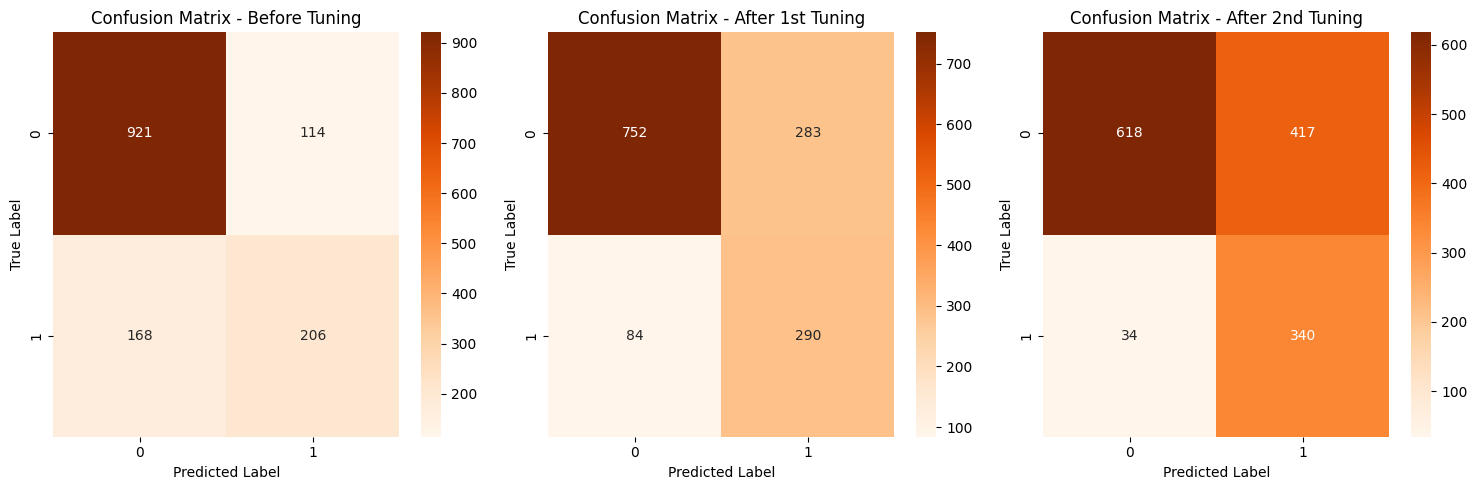

In [725]:
# Confusion Matrix sebelum tuning
cm_before_tuning = confusion_matrix(y_test, y_pred_before)

# Confusion Matrix setelah 1st tuning
cm_after_tuning = confusion_matrix(y_test, y_pred_after)

# Confusion Matrix setelah 2nd tuning
cm_after_tuning2 = confusion_matrix(y_test, y_pred_after2)

plt.figure(figsize=(15, 5))

# Subplot untuk Confusion Matrix sebelum tuning
plt.subplot(1, 3, 1)
sns.heatmap(cm_before_tuning, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Before Tuning')

# Subplot untuk Confusion Matrix setelah 1st tuning
plt.subplot(1, 3, 2)
sns.heatmap(cm_after_tuning, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - After 1st Tuning')

# Subplot untuk Confusion Matrix setelah 2nd tuning
plt.subplot(1, 3, 3)
sns.heatmap(cm_after_tuning2, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - After 2nd Tuning')

plt.tight_layout()
plt.show()


Berikutnya bedasarkan hasil quadrant confussion matrix kita akan menerapkan sebuah sekenario untuk menentukan kerugian perusahaan sebelum dan sesudah menggunakn machine learning. Sesuai dengan Metric Evaluation dimana setiap FN(Seorang diprediksi tidak akan churn padahal churn) akan merugi sekitar `$200` dan setiap FP(Seorang diprediksi churn padahal tidak churn) akan merugi `$100`.

- cost FN = $200
- cost FP = $100

- **Tanpa Machine Learning**
    - Total Data: 1409
    - Kerugian = cost FP x (Total - (FN + TP)): $100 x (1409 - 374) = $103,500

- **Dengan Machine Learning (Before Tuning)**
    - Total FN: $200 x 168: $33,600
    - Total FP: $100 x 114: $11,400
    - Rugi total Perusahaan: $45,000
    
- **Dengan Machine Learning (After 1st Tuning)**
    - Total FN: $200 x 84: $16,800
    - Total FP: $100 x 283: $28,300
    - Rugi total Perusahaan: $45,100

- **Dengan Machine Learning (After 2nd Tuning)**
    - Total FN: $200 x 34: $6,800
    - Total FP: $100 x 417: $41,700
    - Rugi total Perusahaan: $48,500 

Menurut perhitungan diatas, dapat dilihat bahwa hyperparameter tuning kedua memberikan kerugian yang lebih besar dibandingkan tuning pertama. Tuning pertama juga mengalami kerugian namun tidak sebesar tuning kedua dibandingkan dengan base model(sebelum tuning). Dapat disumpilkan bahwa machine learning cukup bisa membantu perusahaan agar terhindari dari rugi yang sangat besar. Dapat dilihat, dengan hasil machine learning base model. Perusahaan sudah bisa mengurangi kerugian hingga $58,500. Bila dipersentasekan, machine learning dapat mengurangi cost perusahaan sebanyak 43.48%

In [698]:
# Get feature names from the transformers in ColumnTransformer
feature_pipe = list(model_after['transformer'].transformers_[0][2])
feature_onehot = list(model_after['transformer'].transformers_[1][1].get_feature_names_out())

# If remainder transformer exists, get feature names
if len(model_after['transformer'].transformers_) > 2:
    feature_remainder = list(X.columns[model_after['transformer'].transformers_[-1][2]])
else:
    feature_remainder = []

# Combine all features
features = feature_pipe + feature_onehot + feature_remainder

# Create a DataFrame for coefficients and their corresponding features
coefficients_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model_after['modeling'].coef_[0]  # Accessing coefficients using coef_
})
coefficients_df['AbsoluteCoefficient'] = coefficients_df['Coefficient'].abs()  # Absolute values for importance
coefficients_df = coefficients_df.sort_values(by='AbsoluteCoefficient', ascending=False)

coefficients_df


,Feature,Coefficient,AbsoluteCoefficient
1,MonthlyCharges,-6.027647,6.027647
0,tenure,-4.087999,4.087999
2,TotalCharges,2.723619,2.723619
10,InternetService_Fiber optic,2.245596,2.245596
25,Contract_Two year,-1.470755,1.470755
7,PhoneService_Yes,1.121989,1.121989
23,StreamingMovies_Yes,0.910446,0.910446
24,Contract_One year,-0.849829,0.849829
21,StreamingTV_Yes,0.762099,0.762099
8,MultipleLines_No phone service,0.507638,0.507638


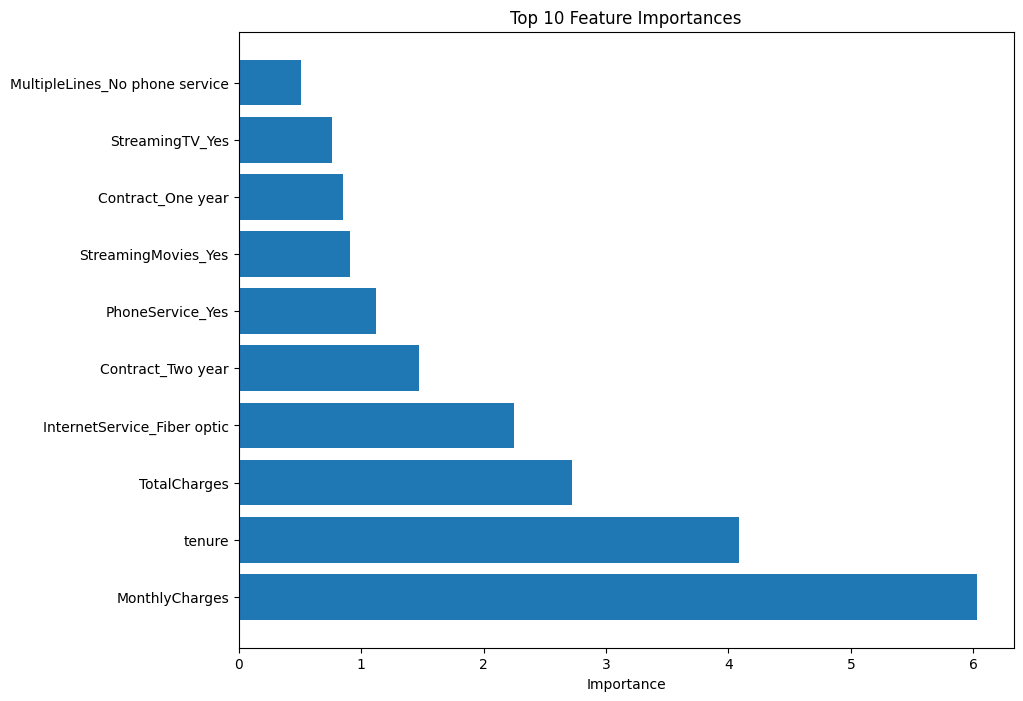

In [696]:
plt.figure(figsize=(10, 8))
plt.barh(coefficients_df['Feature'][:10], coefficients_df['AbsoluteCoefficient'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()


Berdasarkan koefisien dari model Logistic Regression, yang menunjukkan pengaruh terhadap prediksi Churn, dapat ditarik beberapa kesimpulan:

1. `MonthlyCharges`: Fitur ini memiliki nilai koefisien terbesar -6.03, menunjukkan bahwa semaking tinggi nilai bulanan biaya yang dibebankan kepada pelangga, semakin besar kemungkinan pelanggan akan melakukan churn.

2. `tenure`: Dengan koefisien -4.09, fitur ini menunjukan bahwa semakin rendah masa penggunaan layanan oleh pelanggan, semakin besar kemungkinan mereka akan churn.

3. `TotalCharges`: Dengan nilai 2., menyiratkan bahwa semakin tinggi total biaya yang suah dibebankan kepada pelangga, semakin kecil kemungkinan mereka akan churn

In [699]:
print("Classification Report for recall Score After Tuning:")
print(classification_report(y_test, y_pred_after))

Classification Report for recall Score After Tuning:
              precision    recall  f1-score   support

           0       0.95      0.60      0.73      1035
           1       0.45      0.91      0.60       374

    accuracy                           0.68      1409
   macro avg       0.70      0.75      0.67      1409
weighted avg       0.82      0.68      0.70      1409



### **Conclusion and Recommendation**

#### **Conclusion**
Berdasarkan analisis yang dilakukan dengan menggunakan metode machine learning dalam mengidentifikasi tingkat churn dari pelangg, berikut kesimpulan yang dapat diambil:

1. Peningkatan recall Score menggunakan Logistic Regression:
- Model Logistic Regression mengalami peningkatan recall score sebesar 22%, dari 55% sebelum proses tuning menjadi 77% setelah tuning pertama dan menjadi 90% pada tuning kedua.

2. Evaluasi Kinerja Model:
- Positif Precision model: sebesar 45%, menunjukan dari semua yang diprediksi sebagai churn, 45% di antaranya benar-benar churn
- Negatif Percision model: sebesar 95%, menunjukan dari semua yang diprediksi sebagai negatif, 95% di antaranya benar-benar tidak churn
- Model memiliki recall (sensitivitas) yang baik terhadap kelas positive (Churn = 1), mencapai 91%.
- False Positive Rate adalah 40.29%, menunjukan seberapa sering model salah mengklasifikasikan kasus negatif sebagai positif 
- False Negative Rate adalah 9.09% menunjukan seberapa sering model salah mengklasifikasikan kasus positif sebagai negatif

Meskipun recall terhadap kelas positive cukup tinggi, rendahnya persisi menunjukan bahwa terdapat kecendrungan banyaknya false positives. Evaluasu lebih lanjut diperlukan untuk memahami lebih dalam mengenai area di mana model cenderung mengalami kesalahan untuk mengurangi positives dan false negatives.

3. Efisiensi Bisnis:
Terlepas dari evaluasi model, penggunaan machine learning membantu mengurangi biaya churn perusahaan sebesar $58,500. Perusahaan berhasil menurunkan biaya dari $103,500 menjadi $45,000, atau sekitar 43.38%. Model telah membantu mengidentifikasi pelanggan yang berpotensi berhenti berlangganan layanan, memungkinkan pengambilan tindakan yang lebih tepat untuk mempertahankan pelanggan.


### **Recommendation**

- Untuk Bisnis:
    - Dengan memanfaatkan model machine learning untuk mengidentifikasi pelanggan yang berpotensi berhenti berlangganan, perusahaan dapat mengurangi biaya secara signifikan. Dana yang tadinya dialokasikan untuk retensi pelanggan dapat dialokasikan ke area bisnis lainnya.
    - Bedasarkan Hasil analisa graph `Churn vs No Churn Count at Each Tenure`, dapat dilihat bahwa tingkat churn cenderung tinggi pada bulan awal berlangganan hasil tersebut dapat diakibatkan oleh faktor eksternal seperti: 
        - Brand belum memiliki influence yang kuat terhadap pelanggan 
        - Kualitas atau layana yang diberikan tidak sesuai dengan pelangan
        
    Namun seiring lama usia tenure pelanggan probabilitas mereka untuk tidak churn semakin tinggi, mungkin dikarenakan tingkat kepercayaan terhadap brand mulai meningkat dan juga kenyamanan. 

    - Selain itu berdasarkan graph `Churned Services in First 12 Months` dapat dilihat layanan yang memiliki tingkat churn paling tinggi berada pada `StreamingTV` dan `StreamingMovies`. Bisnis tersebut dapat melakukan beberapa hal seperti:
        - Analisa kepuasan pelanggan: lakukan survei untuk memahami alasan di balik churn yang tinggi
        - Perbaikan Konten dan kualitas layanan, bisa menjadi nilai yambah untuk menarik perhatian pelanggan agar tetap mengunakan layanan
        - Penawaran Paket atau promosi, khusus untuk pelanggan baru atau yang sudah ada yang mungkin memilii ketertarikan lebih pada layanan tersebut. 
        - Personalisasi Pengalaman pengguna, gunakan data pelanggan untuk menyesuaikan pengalaman pengguna. Berikan rekomendasi yang lebih personal dan sesuai dengan preferensi masing-masing pelanggan.

- Untuk Model: 
    - Penjelajahan Model Alternatif: 
        Melakukan analisis terhadap kinerja model ensemble lain guna mengetahui apakah terdapat model yang mampu memberikan hasil yang lebih superior dibandingkan model yang sudah ada.
    - Optimisasi Parameter:
        Proses penyetelan parameter (hyperparameter tuning) merupakan tahap krusial untuk meningkatkan kinerja model. Menggunakan teknik seperti GridSearch atau RandomSearch guna menemukan kombinasi parameter terunggul bagi suatu model.
    - Eksplorasi Fitur Tambahan:
        Menggali lebih dalam fitur-fitur tambahan yang mungkin memiliki pengaruh signifikan terhadap retensi pelanggan. Langkah ini mampu memperbaiki performa model dengan adanya variabel yang lebih relevan dan informatif. 

### **References**

- Senthilnayaki, B. & M, Swetha & D, Nivedha. (2021). CUSTOMER CHURN PREDICTION. IARJSET. 8. 527-531. 10.17148/IARJSET.2021.8692. 
- B. Prabadevi, R. Shalini, B.R. Kavitha, Customer churning analysis using machine learning algorithms, International Journal of Intelligent Networks, Volume 4, 2023, Pages 145-154, ISSN 2666-6030,
